In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ds=pd.read_csv('Social_Network_Ads.csv')
x=ds.iloc[:,[2,3]].values
y=ds.iloc[:,4].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [2]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None)

In [3]:
y_pred= classifier.predict(x_test)

In [4]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 7, 25]], dtype=int64)

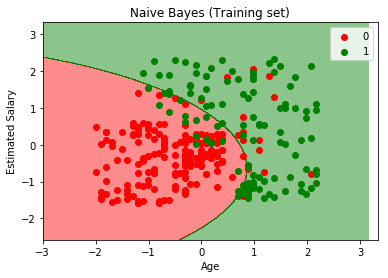

In [12]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min() - 1, stop=x_set[:,0].max() + 1,step=0.01),
                 np.arange(start=x_set[:,1].min() - 1, stop=x_set[:,1].max() + 1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.45, cmap= ListedColormap(('red','green')))
plt.xlim(x1.min(),x2.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


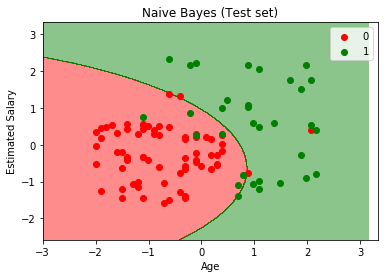

In [14]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min() - 1, stop=x_set[:,0].max() + 1,step=0.01),
                 np.arange(start=x_set[:,1].min() - 1, stop=x_set[:,1].max() + 1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.45, cmap= ListedColormap(('red','green')))
plt.xlim(x1.min(),x2.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1], c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
